# Pro Kabaddi Analysis Season - 7 [2019]

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings("ignore")

In [2]:
match_wise_df = pd.read_csv(r'Pro_Kabaddi_Match_Wise_Stats.csv')
match_wise_df.columns=[col.replace(' ','_').lower() for col in match_wise_df.columns]
match_wise_df['result']= np.where(match_wise_df['team1_score'] > match_wise_df['team2_score'], 
                                  'team1',np.where( match_wise_df['team1_score'] < match_wise_df['team2_score'],
                                                   'team2','tie'))
match_wise_df_completed=match_wise_df.iloc[0:112]

In [3]:
team1_winners=match_wise_df_completed.team1[match_wise_df_completed.result=='team1']
team2_winners=match_wise_df_completed.team2[match_wise_df_completed.result=='team2']

team1_perf=match_wise_df_completed[['match','team1','team1_raid', 'team1_tackle', 'team1_allout', 'team1_extra','result']]
team1_perf['shadow']='team1'
team2_perf=match_wise_df_completed[['match','team2','team2_raid', 'team2_tackle', 'team2_allout', 'team2_extra','result']]
team2_perf['shadow']='team2'
team1_perf.columns = ['match','team','team_raid', 'team_tackle', 'team_allout', 'team_extra','result','shadow']
team2_perf.columns = ['match','team','team_raid', 'team_tackle', 'team_allout', 'team_extra','result','shadow']
over_all_perf=pd.concat([team1_perf,team2_perf],axis=0)
over_all_perf['winner']=over_all_perf[over_all_perf.result == over_all_perf.shadow].team

## Prediction - Post League Matches
* if the performance remains constant then each team has to play 11 matches mean of (matrix * 11) could be a good representative

### Task 2: Predict the top team in the points table after the completion of the league matches. (Max Points: 05)

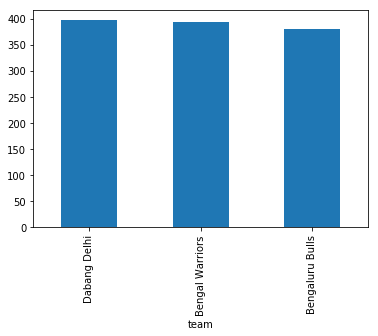

In [4]:
(over_all_perf.groupby('team').mean()*11)[['team_raid',
                                           'team_tackle',
                                           'team_allout',
                                           'team_extra']].sum(axis=1).sort_values(ascending=False).head(3).plot(kind='bar')

### Top Team in point table after league : _"Dabbang Delhi"_

### Task 3: Predict the team with the highest points for successful raids. (Max Points: 05)

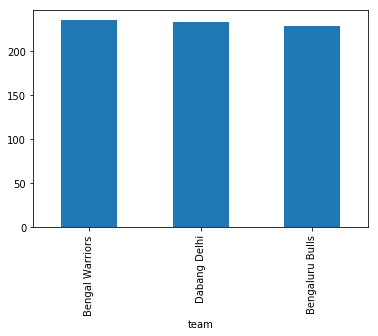

In [5]:
(over_all_perf.groupby('team').mean()*11)[['team_raid']].sum(axis=1).sort_values(ascending=False).head(3).plot(kind='bar')

### Top Team in point table with highest successful raid : _"Bengal Warrior"_

### Task 4: Predict the team with the highest points for successful tackles. (Max Points: 05)

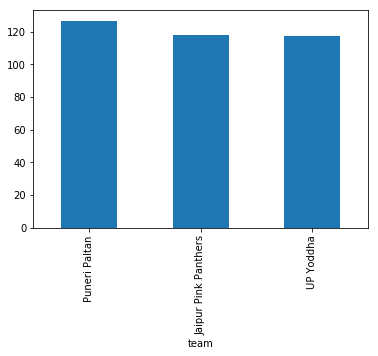

In [6]:
(over_all_perf.groupby('team').mean()*11)[['team_tackle']].sum(axis=1).sort_values(ascending=False).head(3).plot(kind='bar')

### Top Team in point table with highest successful tackle : _"Puneri Paltan"_

### Task 5: Predict the team with the highest super-performance total. (Max Points: 05)
* The super performance total (S.P.T.) of a team is expressed as:
* S.P.T. = Total number of super-raids in the tournament + Total number of super-tackles in the tournament + Total number of all-outs inflicted in the tournament - Total number of all-outs conceded in the tournament

In [7]:
team_scorecard_df=pd.read_csv(r'season7_team_scorecard.csv')

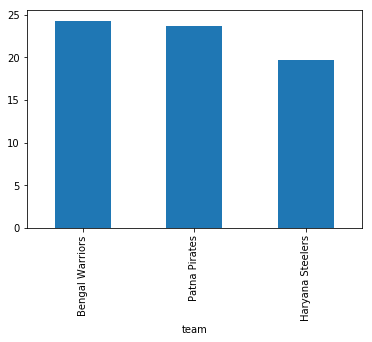

In [8]:
team_scorecard_df['spt']=(team_scorecard_df.super_raid + team_scorecard_df.super_tackle + team_scorecard_df.all_outs_inflicted - team_scorecard_df.all_outs_conceded)*11/team_scorecard_df.matchs_played
team_scorecard_df.groupby('team').sum().spt.sort_values(ascending=False).head(3).plot(kind='bar')

### Top Team in point table with highest super performance : _"Bengal Warrior"_

In [9]:
s7_players_scorecard=pd.read_csv('season7_players_scorecard.csv')
s7_players_scorecard.drop_duplicates(subset=['player_id','index'], keep='first',inplace = True)
s7_players_scorecard=s7_players_scorecard.iloc[:,1:]
s7_players_scorecard.columns=['_'.join(col.split(' ')).lower() for col in s7_players_scorecard.columns]
s7_players_scorecard.team_name=s7_players_scorecard.team_name.str.replace('/teams/','')

## Filtering only Season 7 Players Data

In [10]:
player_team_df=s7_players_scorecard[s7_players_scorecard['index']=='Season 7'][['player_id', 'name', 
                     'type', 'team_id', 'team_name', 'rank', 'index', 
                     'matches_played', 'total_points_earned', 'most_points_in_a_match',
                     'not_out_percent', 'total_raids', 'successful_raids_percent',
                     'no_of_super_raids', 'super_10s', 'total_raid_points',
                     'average_raid_points_per_match', 'no_of_super_tackles', 'high_5s',
                     'total_tackle_points', 'average_tackle_per_match', 'total_tackles',
                     'tackle_strike_rate']]

## Player Analysis:

### Task 6: Predict the player with the highest SUCCESSFUL RAID percentage. (Max Points: 05)
*  (Successful raids/Total raids)x100

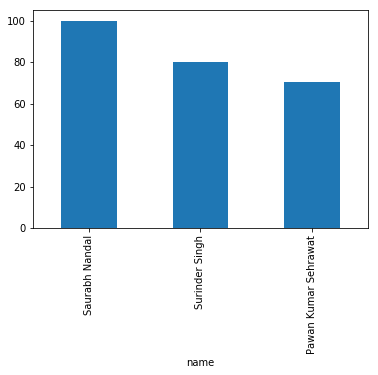

In [11]:
successful_raid_series=player_team_df[player_team_df.matches_played > 10][['successful_raids_percent','name']]
successful_raid_series.index=successful_raid_series['name']
successful_raid_series.successful_raids_percent.sort_values(ascending=False).head(3).plot(kind='bar')

### Top Player with highest successful raid % : _"Saurabh Nandal"_ considering more than 10 matches played

### Task 7: Predict the player with the highest SUCCESSFUL TACKLE percentage. (Max Points: 05)

* (Successful tackles/Total tackles)x100

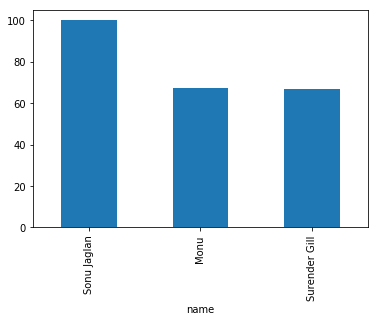

In [12]:
player_team_df['successful_tackle_percent']=player_team_df.total_tackle_points/player_team_df.total_tackles*100
successful_tackle_series=player_team_df[player_team_df.matches_played > 10][['successful_tackle_percent','name']]
successful_tackle_series.index=successful_raid_series['name']
successful_tackle_series.successful_tackle_percent.sort_values(ascending=False).head(3).plot(kind='bar')

### Top Player with highest successful tackle % : _"Sonu Jaglan"_ considering more than 10 matches played

### Task 1: Predict the winner of the tournament. (Max Points: 05)
- find best of 6 from league
- compare #3 vs #6 for eliminator 1 => el1
- compare #4 vs #5 for eliminator 2 => el2
- compare #1 vs el1 => semi1
- compare #2 vs el2 => semi2
- compare semi1 vs semi2 => final

In [13]:
over_all_perf['winner']=over_all_perf[over_all_perf.result == over_all_perf.shadow].team
winner=[]
counter=0
for col in match_wise_df_completed.result:
    if col == 'tie':
        winner.append('tie')
    else:
        winner.append(match_wise_df_completed[col][counter])
    counter+=1

match_wise_df_completed['winner']=pd.Series(winner)
perf_df=pd.DataFrame(np.array(match_wise_df_completed[['team1_raid', 'team1_tackle', 'team1_allout', 'team1_extra']]) - np.array(match_wise_df_completed[['team2_raid', 'team2_tackle', 'team2_allout', 'team2_extra']]),columns=['raid_diff','tackle_diff','allout_diff','extra_diff'])
match_wise_df_completed=match_wise_df_completed.join(perf_df)
match_wise_df_completed.update(-1*match_wise_df_completed[match_wise_df_completed.result=='team2'][['raid_diff','tackle_diff','allout_diff','extra_diff']])
match_wise_df_completed['score_diff']=match_wise_df_completed[['raid_diff','tackle_diff','allout_diff','extra_diff']].sum(axis=1)
match_wise_perf_df=match_wise_df_completed[['match','team1','team2','winner','raid_diff','tackle_diff','allout_diff','extra_diff','score_diff']]
match_wise_perf_df['match'] = match_wise_perf_df['match'].astype('category')

In [14]:
# best of 6 from league
league_rank=(over_all_perf.groupby('team').mean()*11)[['team_raid',
                                           'team_tackle',
                                           'team_allout',
                                           'team_extra']].sum(axis=1).sort_values(ascending=False).head(6)

In [15]:
rank_1=league_rank.index[0]
rank_2=league_rank.index[1]
rank_3=league_rank.index[2]
rank_4=league_rank.index[3]
rank_5=league_rank.index[4]
rank_6=league_rank.index[5]

In [16]:
def predict_winner(t1 , t2):
    match_stats=match_wise_df_completed[((match_wise_df_completed.team1 == t1) & (match_wise_df_completed.team2 == t2)) |
                                 ((match_wise_df_completed.team2 == t1) & (match_wise_df_completed.team1 == t2))][['team1','team2','winner',  'raid_diff',  'tackle_diff',  'allout_diff', 'extra_diff',  'score_diff']]
    t1_win_cnt=len(match_stats[match_stats.winner == t1])
    t2_win_cnt=len(match_stats[match_stats.winner == t2])
    if (t1_win_cnt > t2_win_cnt):
        return t1
    elif (t1_win_cnt < t2_win_cnt):
        return t2
    else:
        t1_score_diff=sum(match_stats[match_stats.winner == t1].score_diff)
        t2_score_diff=sum(match_stats[match_stats.winner == t2].score_diff)
        if (t1_score_diff > t2_score_diff):
            return t1
        elif (t1_score_diff < t2_score_diff):
            return t2
        else:
            return 'TIE'

### Predicting Eliminator 1
- Between Rank #3 vs Rank #6

In [17]:
print(rank_3,' vs', rank_6)
el1=predict_winner(rank_3, rank_6)
print('Predicted winner Eliminator 1:',el1)

Bengaluru Bulls  vs Puneri Paltan
Predicted winner Eliminator 1: Puneri Paltan


### Predicting Eliminator 2
- Between Rank #4 vs Rank #5

In [18]:
print(rank_4,' vs', rank_5)
el2=predict_winner(rank_4, rank_5)
print('Predicted winner Eleminator 2:',el2)

Patna Pirates  vs Haryana Steelers
Predicted winner Eleminator 2: Haryana Steelers


### Predicting Semifinals 1
- Between Rank #1 vs Eliminator #1

In [19]:
print(rank_1,' vs', el1)
semi1=predict_winner(rank_1, el1)
print('Predicted winner Semifinal 1:',semi1)

Dabang Delhi  vs Puneri Paltan
Predicted winner Semifinal 1: Dabang Delhi


### Predicting Semifinals 2
- Between Rank #2 vs Eliminator #2

In [20]:
print(rank_2,' vs', el2)
semi2=predict_winner(rank_2, el2)
print('Predicted winner Semifinal 2:',semi2)

Bengal Warriors  vs Haryana Steelers
Predicted winner Semifinal 2: Bengal Warriors


### Predicting Finals
- Between Semifinals #1 vs Semifinals #2

In [21]:
print(semi1,' vs', semi2)
final=predict_winner(semi1, semi2)
print('Predicted winner final :',final)

Dabang Delhi  vs Bengal Warriors
Predicted winner final : TIE


### Finally the winner considering performance of all the teams so far in season 7
# "TIE" between _"Dabang Delhi  & Bengal Warriors"_

#### But if we consider the past performnce one match between Dabang Delhi  vs Bengal Warriors : match - 45

In [22]:
match_wise_df_completed[match_wise_df_completed.index == 45]

,date,match,team1,team1_score,team2_score,team2,venue,team1_raid,team1_tackle,team1_allout,team1_extra,team2_raid,team2_tackle,team2_allout,team2_extra,result,winner,raid_diff,tackle_diff,allout_diff,extra_diff,score_diff
45,8/17/2019,46,Bengal Warriors,30.0,30.0,Dabang Delhi,Chennai Jawaharlal Nehru Stdm,19.0,7.0,2.0,2.0,18.0,7.0,2.0,3.0,tie,tie,1.0,0.0,0.0,-1.0,0.0


#### Bengal Warriors had one point extra in raiding while Dabbang Delhi had one point extra in Extra points.
### Giving an higher priority to raiding against Extra point we have decided to go with the final winner as 

# _"Bengal Warrior"_

# Thank you!!